In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/HW2

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/HW2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import math

In [ ]:
dataset_path = "cleaned_dataset.npz"
data = np.load(dataset_path)
training_set = data["training_set"]
X_train_val = training_set[:, 0]
y_train_val = training_set[:, 1]
X_test = data["test_set"]

In [ ]:
print(training_set.shape)

print(X_train_val.shape)
print(y_train_val.shape)
print(X_test.shape)

print(X_train_val.min())
print(X_train_val.max())
print(y_train_val.min())
print(y_train_val.max())

(2505, 2, 64, 128)
(2505, 64, 128)
(2505, 64, 128)
(10022, 64, 128)
2.8860931396484375
253.01019287109375
0.0
4.0


In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

augmentation_pipeline = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ElasticTransform(alpha=50, sigma=6, p=0.5),
    #A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=30, p=0.5),  # Random shifts, scale, and rotations
    #A.GaussianBlur(blur_limit=3, p=0.3),  # Gaussian blur with a limit of 3
    #A.GridDistortion(num_steps=5, distort_limit=0.3, p=0.3),  # Grid distortion for irregularities
    ToTensorV2()
])

# Apply augmentations dynamically during training
def augment(image, mask):
    augmented = augmentation_pipeline(image=image, mask=mask)
    return augmented['image'], augmented['mask']

from torch.utils.data import Dataset

class AugmentedDataset(Dataset):
    def __init__(self, images, masks, transform):
        self.images = images
        self.masks = masks
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        mask = self.masks[idx]
        augmented = self.transform(image=image, mask=mask)
        return augmented['image'], augmented['mask']

# Initialize dataset
dataset = AugmentedDataset(X_train_val, y_train_val, transform=augmentation_pipeline)
# Assuming `dataset` is a PyTorch Dataset object
images = []
masks = []

for img, mask in dataset:
    images.append(img.numpy())  # Convert PyTorch tensor to NumPy array
    masks.append(mask.numpy())  # Convert PyTorch tensor to NumPy array

# Convert lists to NumPy arrays
X_train_val = np.squeeze(np.array(images), axis=1)
y_train_val = np.array(masks)


print(X_train_val.shape)  # Shape of images
print(y_train_val.shape)   # Shape of masks
print(X_train_val.min())
print(X_train_val.max())
print(y_train_val.min())
print(y_train_val.max())

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


(2505, 64, 128)
(2505, 64, 128)
2.9826889485120773
253.01019287109375
0.0
4.0


In [ ]:
X_train_val_norm = X_train_val.astype(np.float32)/255.0
X_test_norm = X_test.astype(np.float32)/255.0

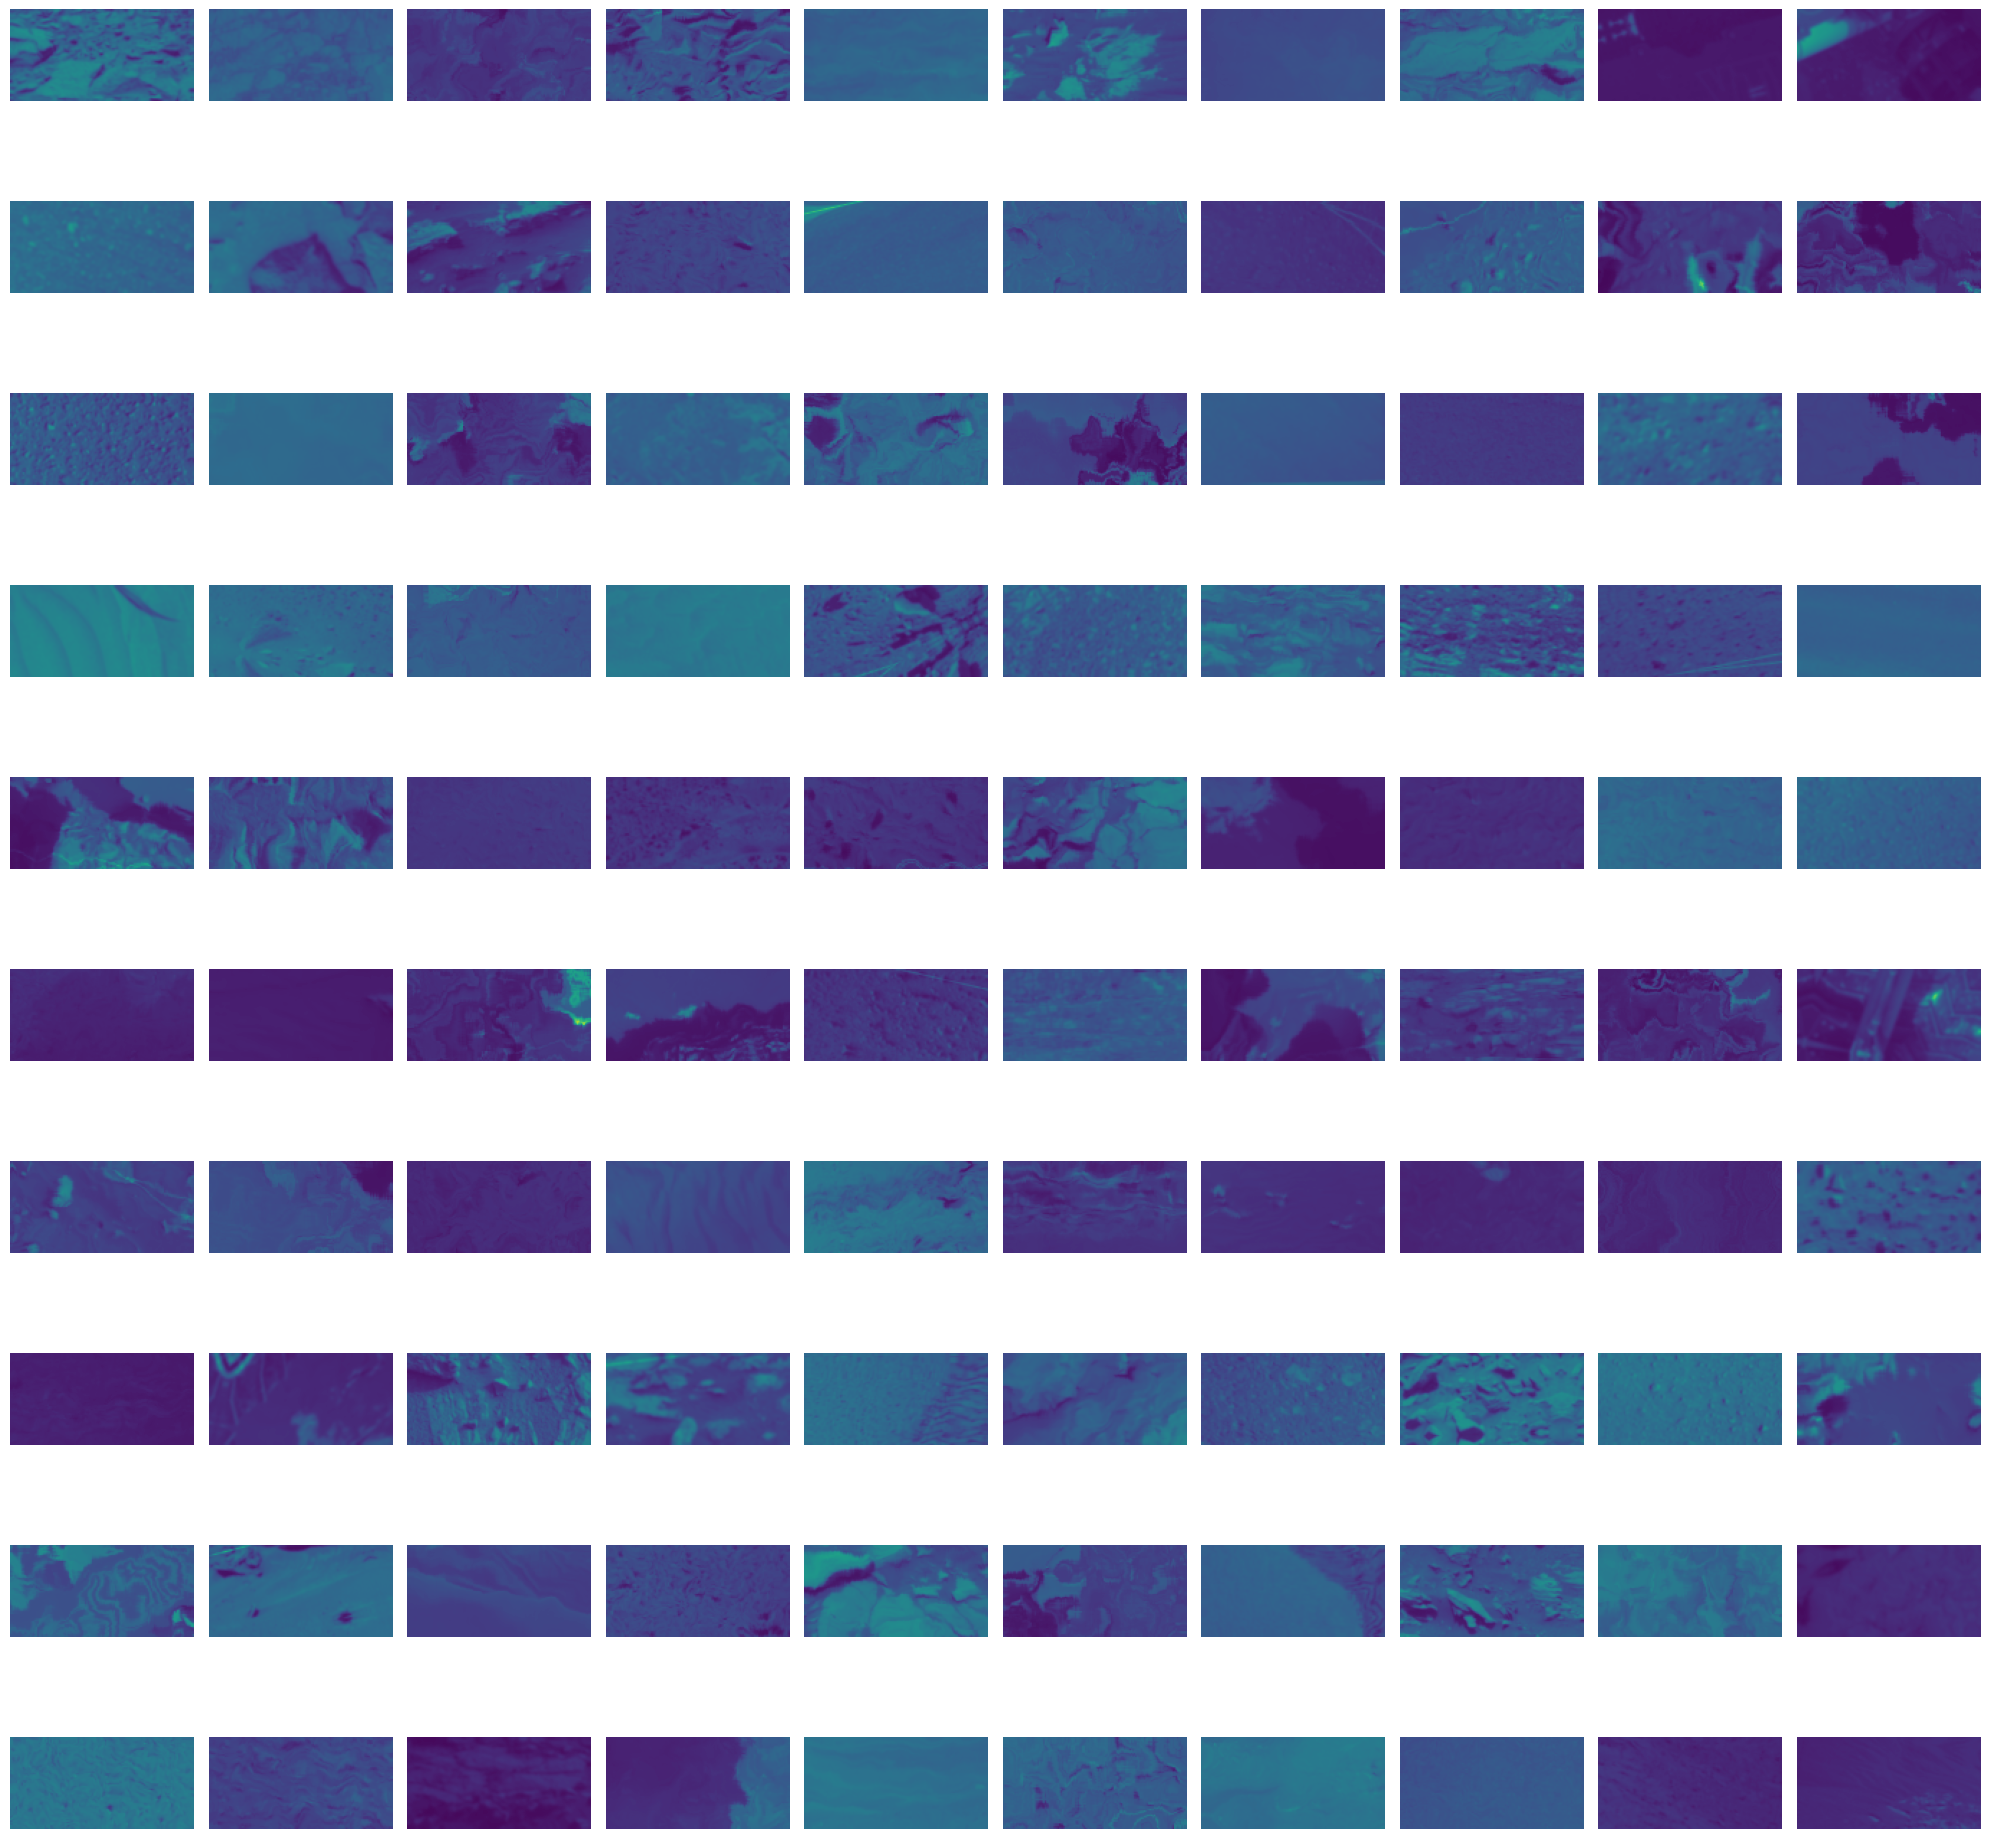

[2340, 133, 1756, 1976, 2367, 60, 844, 1894, 2012, 1136, 656, 140, 2132, 2007, 1342, 311, 1023, 1479, 182, 1721, 568, 2470, 1454, 1563, 1725, 1161, 1074, 1871, 715, 1241, 1485, 544, 980, 1800, 1536, 181, 2387, 16, 965, 548, 798, 1240, 2196, 1499, 983, 1287, 2248, 1845, 1785, 1925, 266, 2394, 1329, 2055, 640, 918, 1691, 976, 151, 130, 2034, 1233, 2484, 295, 2185, 331, 613, 1574, 2323, 1532, 2462, 462, 395, 1808, 681, 782, 1428, 1774, 1696, 1825, 1005, 1125, 587, 2137, 730, 489, 1093, 1866, 1239, 675, 713, 721, 1966, 1423, 1343, 1780, 916, 20, 2231, 178]


In [ ]:
# Display a sample of images from the training-validation dataset
num_img = 100
random.seed(10)
random_indices = random.sample(range(len(X_train_val_norm)), num_img)

rows = math.ceil(num_img**0.5)
cols = math.ceil(num_img / rows)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))

# Iterate through the selected images
for i, idx in enumerate(random_indices):
    row, col = divmod(i, cols)
    ax = axes[row, col] if rows > 1 else axes[col]
    ax.imshow(np.squeeze(X_train_val_norm[idx]), vmin=0., vmax=1.)
    ax.axis('off')

# Adjust layout and display the images
plt.tight_layout()
plt.show()
print(random_indices)

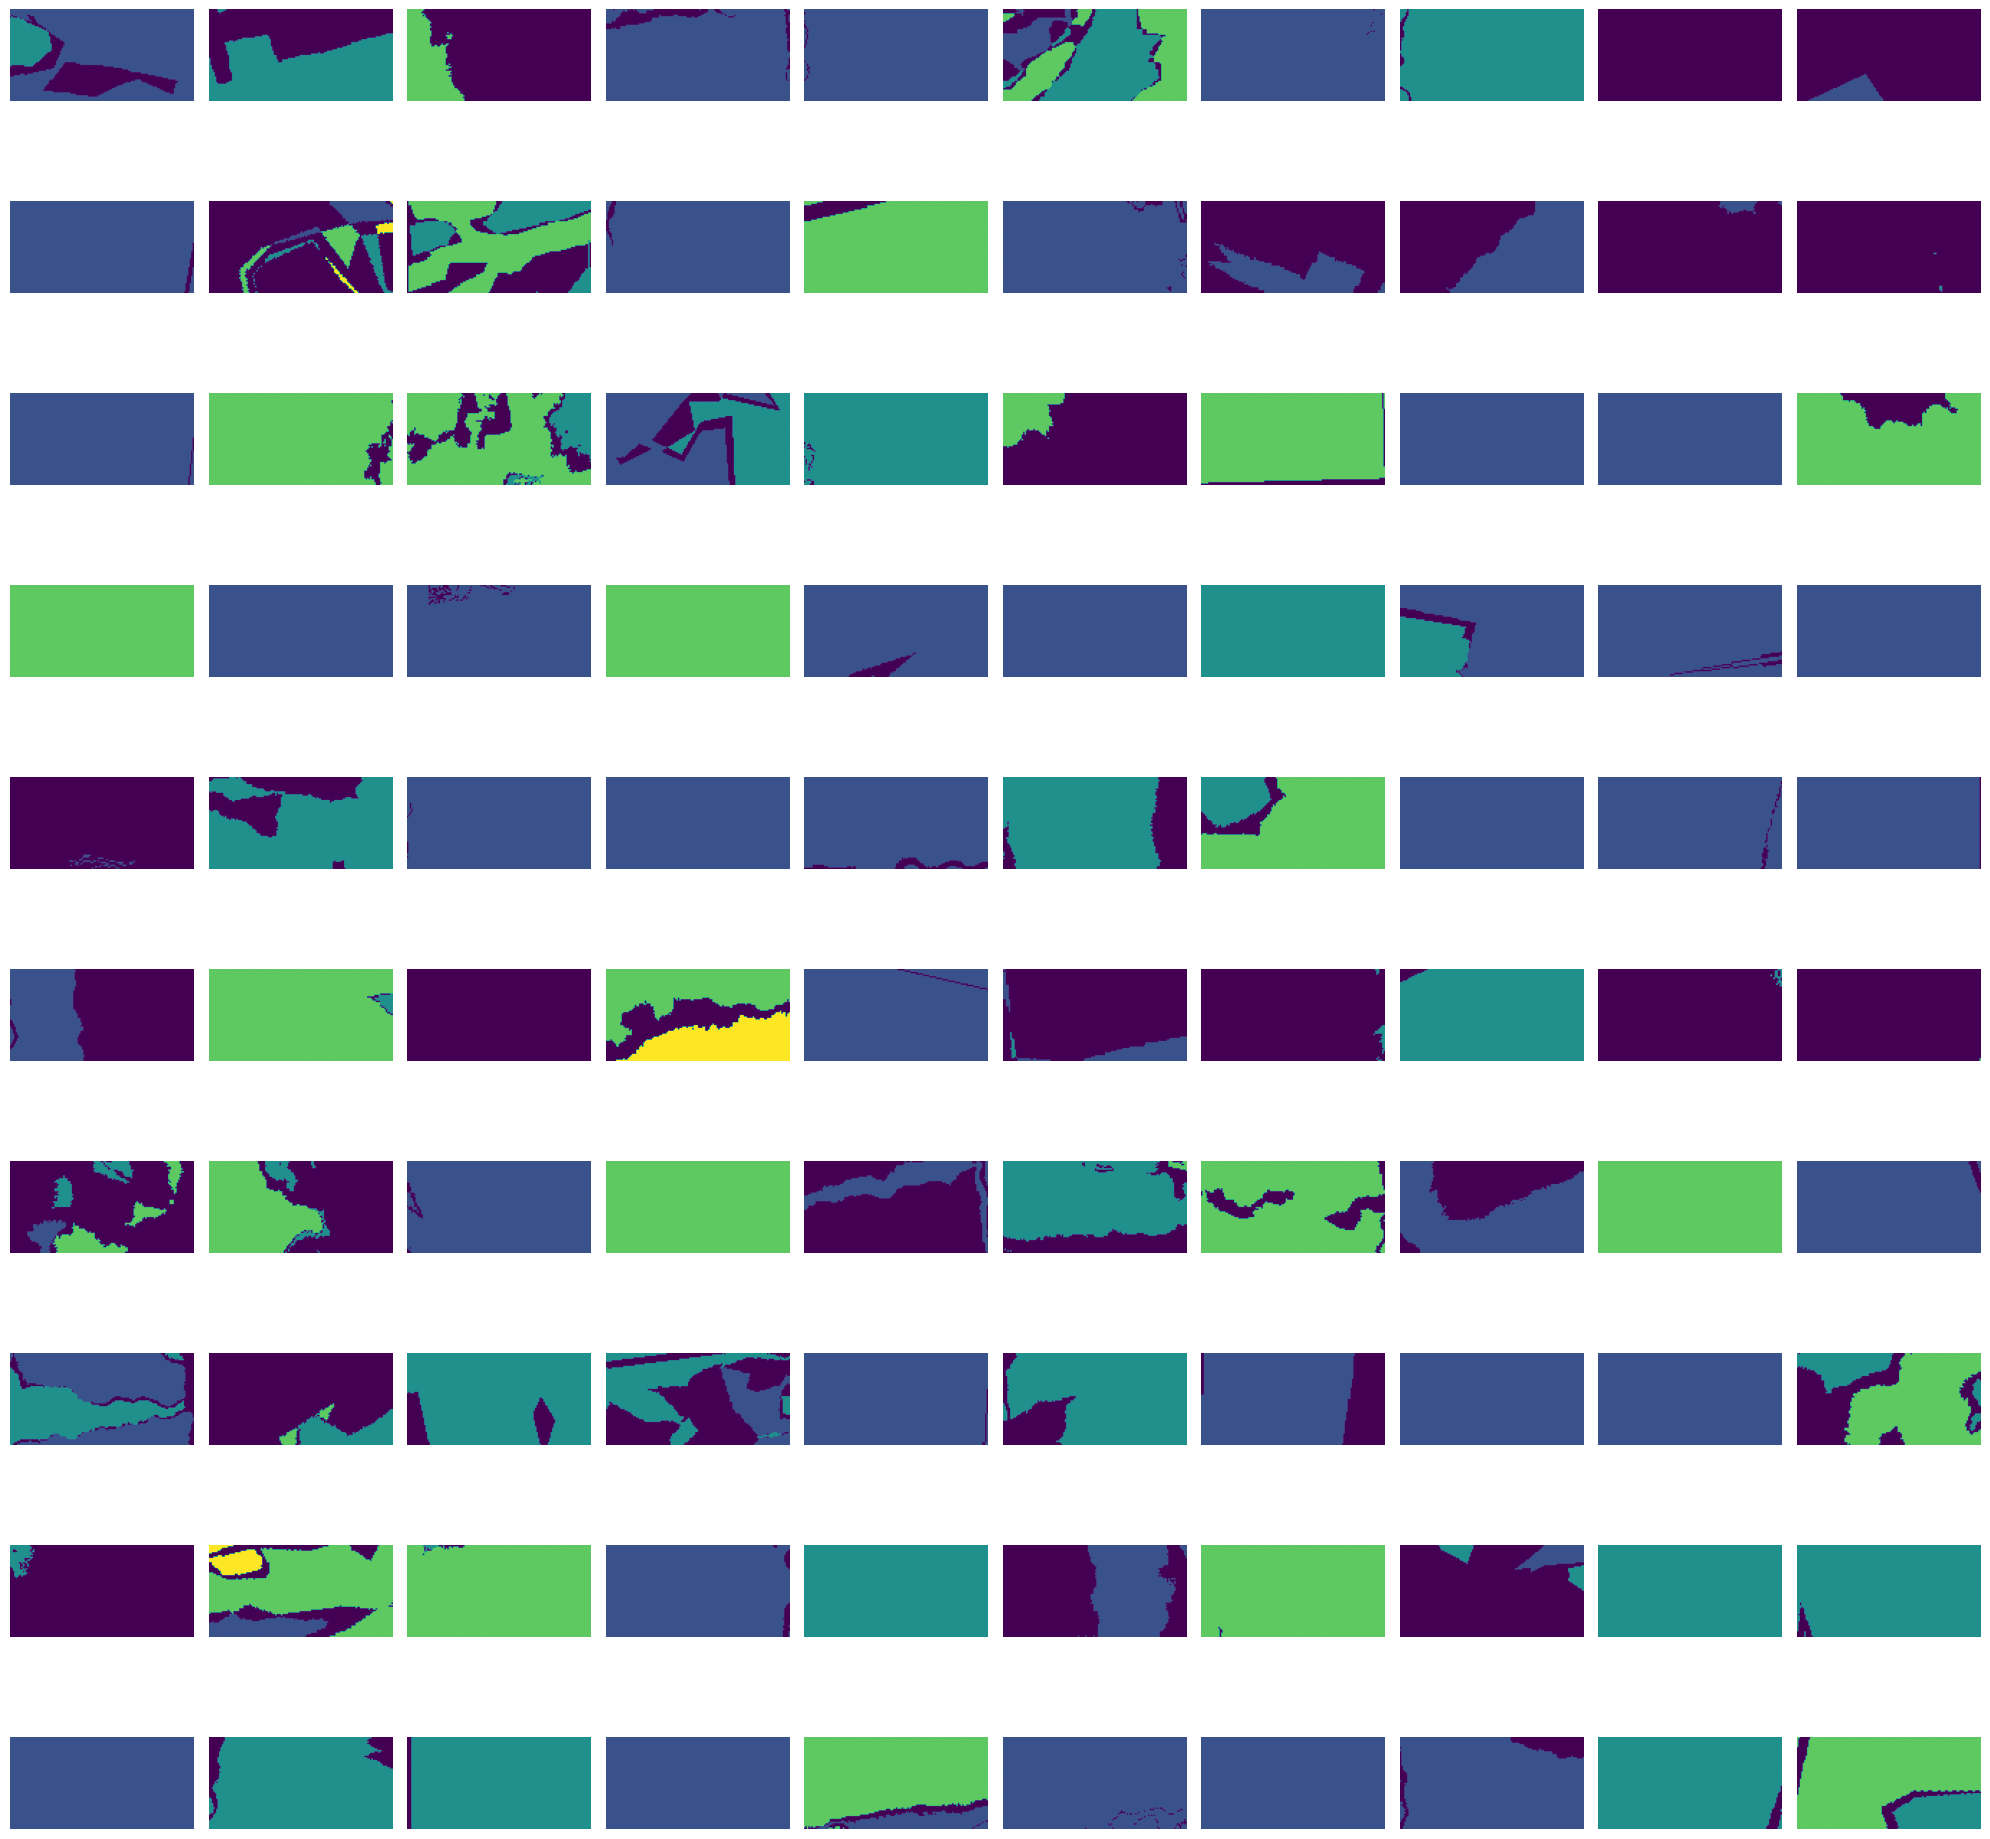

[2340, 133, 1756, 1976, 2367, 60, 844, 1894, 2012, 1136, 656, 140, 2132, 2007, 1342, 311, 1023, 1479, 182, 1721, 568, 2470, 1454, 1563, 1725, 1161, 1074, 1871, 715, 1241, 1485, 544, 980, 1800, 1536, 181, 2387, 16, 965, 548, 798, 1240, 2196, 1499, 983, 1287, 2248, 1845, 1785, 1925, 266, 2394, 1329, 2055, 640, 918, 1691, 976, 151, 130, 2034, 1233, 2484, 295, 2185, 331, 613, 1574, 2323, 1532, 2462, 462, 395, 1808, 681, 782, 1428, 1774, 1696, 1825, 1005, 1125, 587, 2137, 730, 489, 1093, 1866, 1239, 675, 713, 721, 1966, 1423, 1343, 1780, 916, 20, 2231, 178]


In [ ]:
# Display a sample of images from the training-validation dataset
num_img = 100
random.seed(10)
random_indices = random.sample(range(len(X_train_val_norm)), num_img)

rows = math.ceil(num_img**0.5)
cols = math.ceil(num_img / rows)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))

# Iterate through the selected images
for i, idx in enumerate(random_indices):
    row, col = divmod(i, cols)
    ax = axes[row, col] if rows > 1 else axes[col]
    ax.imshow(np.squeeze(y_train_val[idx]), vmin=0., vmax=4.)
    ax.axis('off')

# Adjust layout and display the images
plt.tight_layout()
plt.show()
print(random_indices)

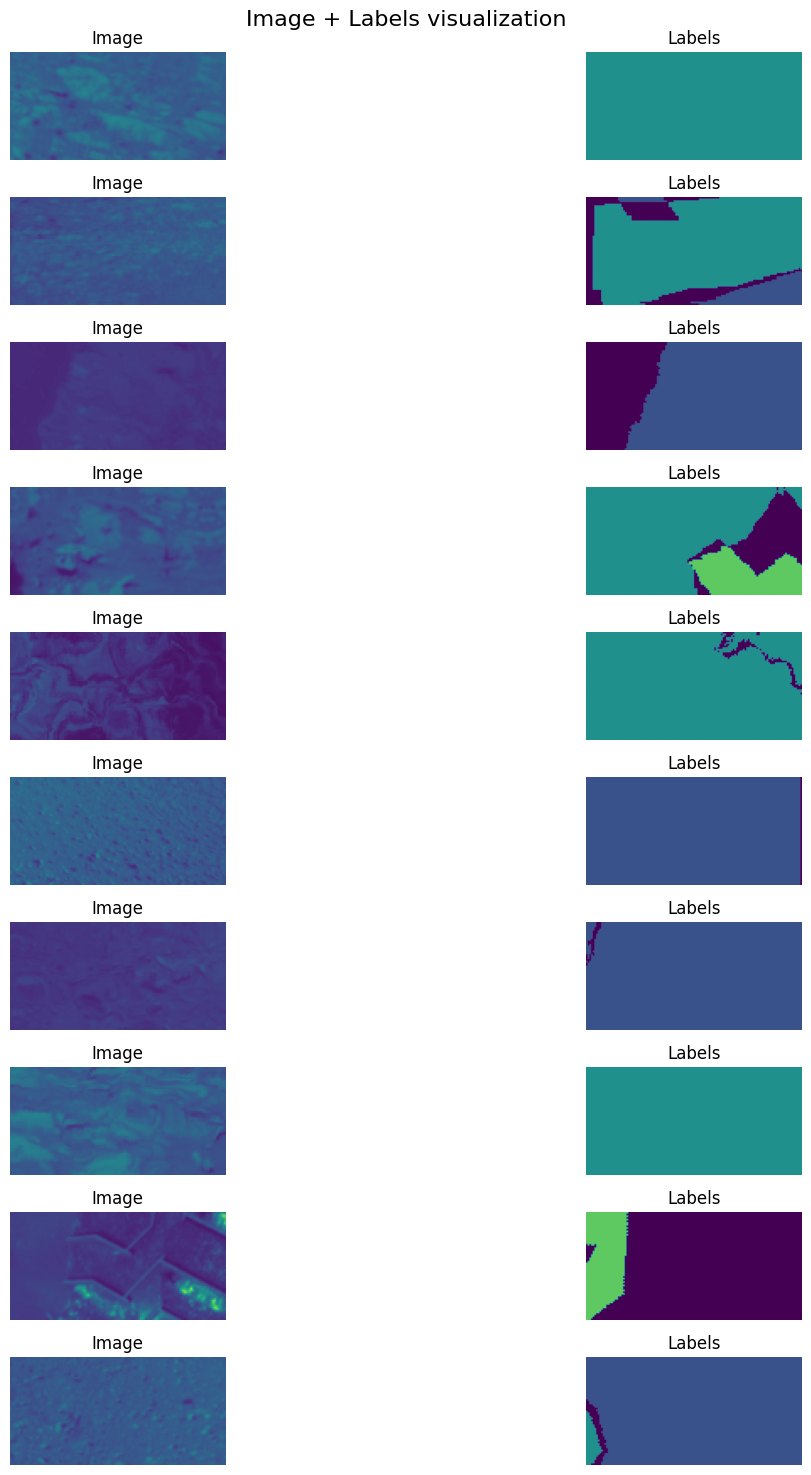

In [ ]:
num_img = 10
#random.seed(10)
random_indices = random.sample(range(len(X_train_val_norm)), num_img)

# Prepara il layout per le immagini
fig, axes = plt.subplots(num_img, 2, figsize=(15, 15))
fig.suptitle("Image + Labels visualization", fontsize=16)

for i, idx in enumerate(random_indices):

    # Visualizza immagini
    axes[i, 0].imshow(np.squeeze(X_train_val_norm[idx]), vmin=0., vmax=1.)
    axes[i, 0].set_title("Image")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(np.squeeze(y_train_val[idx]), vmin=0., vmax=4.)
    axes[i, 1].set_title("Labels")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Display a sample of images from the training-validation dataset
num_img = 100
#random.seed(10)
random_indices = random.sample(range(len(X_test_norm)), num_img)

rows = math.ceil(num_img**0.5)
cols = math.ceil(num_img / rows)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))

# Iterate through the selected images
for i, idx in enumerate(random_indices):
    row, col = divmod(i, cols)
    ax = axes[row, col] if rows > 1 else axes[col]
    ax.imshow(np.squeeze(X_test_norm[idx]), vmin=0., vmax=1.)
    ax.axis('off')

# Adjust layout and display the images
plt.tight_layout()
plt.show()
print(random_indices)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
training_set2 = np.stack((X_train_val, y_train_val), axis=1)

In [ ]:
training_set_aug = np.concatenate((training_set, training_set2), axis=0)

In [ ]:
np.savez('augmented_dataset.npz', training_set=training_set_aug, test_set=X_test)

In [ ]:
import numpy as np
import cv2

def poisson_blend(class_region, target_image, target_position):
    """
    Blends the extracted class region into the target image using Poisson blending.
    """
    # Ensure the input images are of type uint8
    class_region = class_region.astype(np.uint8)
    target_image = target_image.astype(np.uint8)

    # Convert grayscale images to 3 channels (needed for seamlessClone)
    class_region_color = cv2.cvtColor(class_region, cv2.COLOR_GRAY2BGR)
    target_image_color = cv2.cvtColor(target_image, cv2.COLOR_GRAY2BGR)

    # Create a binary mask for the class region
    mask = np.ones(class_region.shape[:2], dtype=np.uint8) * 255

    # Perform seamless cloning
    center = (target_position[0] + class_region.shape[1] // 2, target_position[1] + class_region.shape[0] // 2)
    blended_image = cv2.seamlessClone(class_region_color, target_image_color, mask, center, cv2.MIXED_CLONE)

    # Convert back to grayscale
    blended_image_gray = cv2.cvtColor(blended_image, cv2.COLOR_BGR2GRAY)

    return blended_image_gray


def blend_masks(source_mask, target_mask, class_id, target_position, class_region_shape):
    """
    Inserts the class_region's mask into the target_mask at the given target_position.
    Args:
        source_mask (np.array): The mask of the source image.
        target_mask (np.array): The mask of the target image.
        class_id (int): The class ID to blend.
        target_position (tuple): (x, y) position for blending the class region.
        class_region_shape (tuple): Shape of the class region (height, width).
    Returns:
        blended_mask (np.array): The target mask with the class region mask blended in.
    """
    # Copy the target mask
    blended_mask = target_mask.copy()

    # Compute the region in the target mask
    target_x, target_y = target_position
    h, w = class_region_shape

    # Insert the source mask's class region
    blended_mask[target_y:target_y + h, target_x:target_x + w] = np.where(
        source_mask[:h, :w] == class_id, class_id, blended_mask[target_y:target_y + h, target_x:target_x + w])

    return blended_mask

def blend_class_into_image(source_image, target_image, source_mask, target_mask, class_id, flag=False):
    """
    Extracts the region of a class from the source_image and source_mask and blends it into the target_image
    and target_mask.
    """

    # Ensure images and masks are 2D
    source_image = np.squeeze(source_image)
    target_image = np.squeeze(target_image)
    source_mask = np.squeeze(source_mask)
    target_mask = np.squeeze(target_mask)

    # Identify the underrepresented class region in the source mask
    underrepresented_coords = np.where(source_mask == class_id)

    # Skip if the class does not exist in the source mask
    if len(underrepresented_coords[0]) == 0:
        #print(f"Class {class_id} not found in source mask. Skipping...")
        return target_image, target_mask, flag

    # Extract the bounding box of the class region
    y_min, y_max = np.min(underrepresented_coords[0]), np.max(underrepresented_coords[0])
    x_min, x_max = np.min(underrepresented_coords[1]), np.max(underrepresented_coords[1])

    # Extract the class region
    class_region = source_image[y_min:y_max, x_min:x_max]
    class_region_mask = source_mask[y_min:y_max, x_min:x_max]

    # Check if the class_region is empty
    if class_region.size == 0 or class_region_mask.size == 0:
        #print("Extracted class region is empty. Skipping...")
        return target_image, target_mask, flag

    # Get the height and width of the region
    h, w = class_region.shape[:2]

    # Determine target region bounds
    max_x = target_image.shape[1] - w
    max_y = target_image.shape[0] - h

    if max_x <= 0 or max_y <= 0:
        #print("Class region too large to fit in target image. Skipping...")
        return target_image, target_mask, flag

    # Randomly choose a position in the target image
    target_x = np.random.randint(0, max_x)
    target_y = np.random.randint(0, max_y)
    target_position = (target_x, target_y)

    # Blend the class region into the target image
    augmented_image = poisson_blend(class_region, target_image, target_position)
    flag=True

    # Blend the class region mask into the target mask
    augmented_mask = blend_masks(class_region_mask, target_mask, class_id, target_position, class_region.shape)

    return augmented_image, augmented_mask, flag



def augment_dataset(images, masks, class_id, augmentations_per_image=25):
    """
    Augments a dataset of images and masks by blending underrepresented class regions into other images.
    """
    augmented_images = []
    augmented_masks = []

    # augment the dataset
    for i in range(len(images)):
        # Select a random target image and mask
        target_idx = np.random.randint(0, len(images))
        target_image = np.squeeze(images[target_idx])
        target_mask = np.squeeze(masks[target_idx])

        try:
            # Blend the source image and mask into the target
            augmented_image, augmented_mask, flag = blend_class_into_image(
                np.squeeze(images[i]), target_image,
                np.squeeze(masks[i]), target_mask,
                class_id
            )
            augmented_images.append(augmented_image)
            augmented_masks.append(augmented_mask)

        except Exception as e:
            #print(f"Error during augmentation: {e}")
            augmented_image, augmented_mask = images[i], masks[i]
            augmented_images.append(augmented_image)
            augmented_masks.append(augmented_mask)

    # focus on the class 4
    for i in range(len(images)):
        for _ in range(augmentations_per_image):
            # Select a random target image and mask
            target_idx = np.random.randint(0, len(images))
            target_image = np.squeeze(images[target_idx])
            target_mask = np.squeeze(masks[target_idx])

            try:
                # Blend the source image and mask into the target
                augmented_image, augmented_mask, flag = blend_class_into_image(
                    np.squeeze(images[i]), target_image,
                    np.squeeze(masks[i]), target_mask,
                    class_id
                )
                if (flag==True):
                  augmented_images.append(augmented_image)
                  augmented_masks.append(augmented_mask)

            except Exception as e:
                #print(f"Error during augmentation: {e}")
                pass

    return np.array(augmented_images), np.array(augmented_masks)

class_id_to_augment = 4
augmented_images, augmented_masks = augment_dataset(training_set_aug[:,0], training_set_aug[:,1], class_id=class_id_to_augment)

print(f"Augmented images shape: {augmented_images.shape}")
print(f"Augmented masks shape: {augmented_masks.shape}")
print(augmented_images.min())
print(augmented_images.max())
print(augmented_masks.min())
print(augmented_masks.max())

augmented_images_norm = augmented_images.astype(np.float32)/255.0

Augmented images shape: (7585, 64, 128)
Augmented masks shape: (7585, 64, 128)
0.0
255.0
0.0
4.0


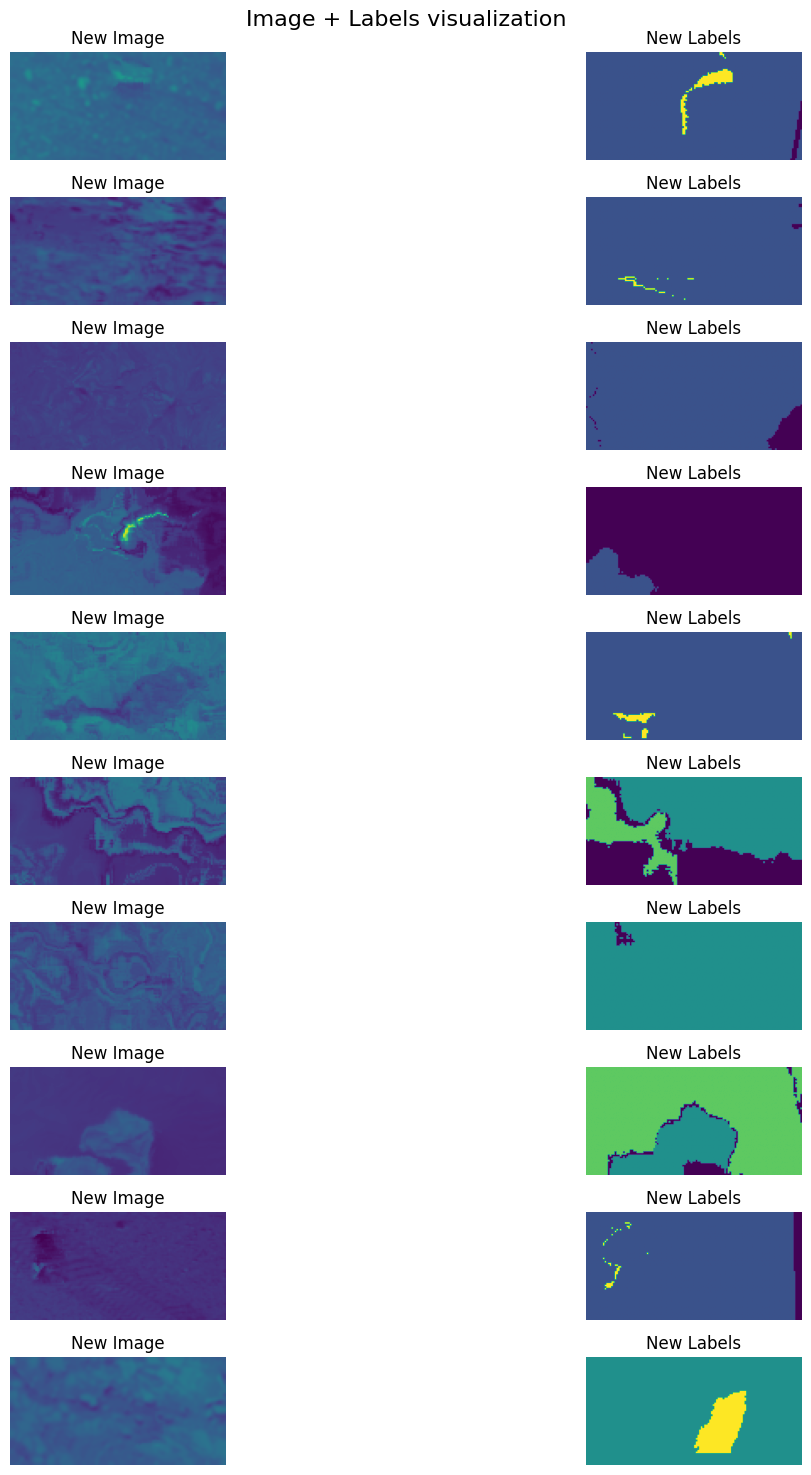

In [ ]:
num_img = 10
#random.seed(10)
random_indices = random.sample(range(len(augmented_images_norm)), num_img)

# Prepara il layout per le immagini
fig, axes = plt.subplots(num_img, 2, figsize=(15, 15))
fig.suptitle("Image + Labels visualization", fontsize=16)

for i, idx in enumerate(random_indices):

    # Visualizza immagini
    axes[i, 0].imshow(np.squeeze(augmented_images_norm[idx]), vmin=0., vmax=1.)
    axes[i, 0].set_title("New Image")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(np.squeeze(augmented_masks[idx]), vmin=0., vmax=4.)
    axes[i, 1].set_title("New Labels")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
training_set3 = np.stack((augmented_images, augmented_masks), axis=1)

In [ ]:
training_set3.shape

(7585, 2, 64, 128)

In [ ]:
training_set_aug2 = np.concatenate((training_set_aug, training_set3), axis=0)

In [ ]:
np.savez('augmented_blended_dataset.npz', training_set=training_set_aug2, test_set=X_test)